In [11]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary

In [12]:
sham = pd.read_csv('ShampooSales.csv')

In [13]:
sham.head()

,Month,Shampoo Sales
0,Jan-95,266.0
1,Feb-95,145.9
2,Mar-95,183.1
3,Apr-95,119.3
4,May-95,180.3


In [14]:
len(sham)

36

In [15]:
# convert the date information to a datetime object
sham['Date'] = pd.to_datetime(sham.Month, format='%b-%y')

# convert dataframe column to series (name is used to label the data)
sham_ts = pd.Series(sham['Shampoo Sales'].values, index=sham.Date, name='Shampoo')

# define the time series frequency
sham_ts.index = pd.DatetimeIndex(sham_ts.index, freq=sham_ts.index.inferred_freq)

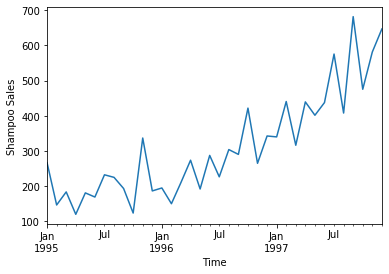

In [16]:
# plot the series
ax = sham_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Shampoo Sales')
plt.show()

Trend component seem to be present in this series.

No, we don't expect to see seasonality in the sales of shampoo as sales peaks year on year.

If the goal is forecasting sales in future months, the steps that need to be taken are:
1) Partition the data into training and validation sets
2) Look at MAPE and RMSE values for the training set
3) Look at MAPE and RMSE values for the validation set